In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./smalldata.csv')

In [3]:
data = data.replace('X', 0)
data = data.replace('x', 0)
data = data.replace('O', 1)

In [4]:
data

,date,day,total_sleep_hour,bed_time,quality_written,quality_app,last_meal,last_meal_menu,last_meal_heaviness,phone_before_bed,...,exercise_type,exercise_time,exercise_strength,tiredness,min_taken_since_first_alarm,num_of_alarm,nap_next_day,drowsiness,online_game,etc
0,8/2,금,300,29:54:00,10,31.0,54,NaN,2,1,...,0,0,0,8,120,4,0,1,0.0,NaN
1,8/3,토,744,28:26:00,5,NaN,11,"롯데리아 하바네로, 감자튀김, 콜라",3,1,...,0,0,0,2,0,0,0,0,290.0,"불, 티비 켜놓고 잠"
2,8/4,일,208,29:14:00,8,76.0,269,BBQ 황금올리브치킨,3,1,...,0,0,0,6,42,5,1,0,208.0,NaN
3,8/5,월,670,28:15:00,8,NaN,25,"홈런볼, 봉봉",1,1,...,0,0,0,3,270,4,0,0,363.0,NaN
4,8/6,화,181,29:34:00,6,25.0,269,베라,1,1,...,0,0,0,8,40,4,0,1,0.0,NaN
5,8/7,수,486,25:46:00,8,64.0,286,"리조또, 립아이 스테이크, 티라미슈",2,1,...,0,0,0,3,25,4,1,0,0.0,NaN
6,8/8,목,351,26:49:00,2,57.0,289,곱창,2,0,...,0,0,0,10,40,4,0,0,95.0,NaN
7,8/9,금,820,20:20:00,10,95.0,25,짬뽕밥,3,1,...,0,0,0,0,0,0,1,0,0.0,NaN
8,8/10,토,256,30:26:00,5,39.0,201,짜장밥,3,1,...,0,0,0,6,10,3,0,0,154.0,NaN
9,8/11,일,255,25:25:00,5,NaN,240,"벌집핏자, 아이스티",1,1,...,수영,240,7.5,8,10,3,1,0,99.0,NaN


In [5]:
#data = data.drop(columns="Unnamed: 21")

In [6]:
data = data.drop(columns=["last_meal_menu", "etc", "stress_cause", "exercise_type"])

In [7]:
data.dtypes

date                            object
day                             object
total_sleep_hour                 int64
bed_time                        object
quality_written                  int64
quality_app                    float64
last_meal                        int64
last_meal_heaviness              int64
phone_before_bed                 int64
phone_usage_time                object
nap                              int64
stress_strength                  int64
alcohol                          int64
caffein_coffee                  object
caffein_etc                      int64
exercise                         int64
exercise_time                   object
exercise_strength               object
tiredness                        int64
min_taken_since_first_alarm     object
num_of_alarm                    object
nap_next_day                     int64
drowsiness                       int64
online_game                    float64
dtype: object

In [8]:
data['phone_usage_time'].astype(str).astype(int)
data['caffein_coffee'].astype(str).astype(int)
data['exercise_time'].astype(str).astype(int)
data['exercise_strength'].astype(str).astype(float)
data['num_of_alarm'].astype(str).astype(int)
data['min_taken_since_first_alarm'].astype(str).astype(int)

0     120
1       0
2      42
3     270
4      40
5      25
6      40
7       0
8      10
9      10
10     26
11     30
12      0
13     26
14     45
15      0
16     26
17     22
Name: min_taken_since_first_alarm, dtype: int32

In [9]:
data.head(10)

,date,day,total_sleep_hour,bed_time,quality_written,quality_app,last_meal,last_meal_heaviness,phone_before_bed,phone_usage_time,...,caffein_etc,exercise,exercise_time,exercise_strength,tiredness,min_taken_since_first_alarm,num_of_alarm,nap_next_day,drowsiness,online_game
0,8/2,금,300,29:54:00,10,31.0,54,2,1,10,...,0,0,0,0,8,120,4,0,1,0.0
1,8/3,토,744,28:26:00,5,NaN,11,3,1,5,...,0,0,0,0,2,0,0,0,0,290.0
2,8/4,일,208,29:14:00,8,76.0,269,3,1,4,...,0,0,0,0,6,42,5,1,0,208.0
3,8/5,월,670,28:15:00,8,NaN,25,1,1,5,...,0,0,0,0,3,270,4,0,0,363.0
4,8/6,화,181,29:34:00,6,25.0,269,1,1,300,...,0,0,0,0,8,40,4,0,1,0.0
5,8/7,수,486,25:46:00,8,64.0,286,2,1,5,...,0,0,0,0,3,25,4,1,0,0.0
6,8/8,목,351,26:49:00,2,57.0,289,2,0,0,...,0,0,0,0,10,40,4,0,0,95.0
7,8/9,금,820,20:20:00,10,95.0,25,3,1,3,...,0,0,0,0,0,0,0,1,0,0.0
8,8/10,토,256,30:26:00,5,39.0,201,3,1,20,...,0,0,0,0,6,10,3,0,0,154.0
9,8/11,일,255,25:25:00,5,NaN,240,1,1,60,...,0,1,240,7.5,8,10,3,1,0,99.0


In [10]:
data.columns

Index(['date', 'day', 'total_sleep_hour', 'bed_time', 'quality_written',
       'quality_app', 'last_meal', 'last_meal_heaviness', 'phone_before_bed',
       'phone_usage_time', 'nap', 'stress_strength', 'alcohol',
       'caffein_coffee', 'caffein_etc', 'exercise', 'exercise_time',
       'exercise_strength', 'tiredness', 'min_taken_since_first_alarm',
       'num_of_alarm', 'nap_next_day', 'drowsiness', 'online_game'],
      dtype='object')

In [184]:
#0.27
data2 = data[['quality_written', 'total_sleep_hour']]

In [51]:
#-0.19
data2 = data[['quality_written', 'last_meal']]

In [53]:
#0.0
data2 = data[['quality_written', 'last_meal_heaviness']]

In [55]:
#0.56
data2 = data[['quality_written', 'phone_before_bed']]

In [103]:
#-0.11
data2 = data[['quality_written', 'phone_usage_time']].astype(str).astype(int)

In [63]:
#0.0
data2 = data[['quality_written', 'stress_strength']]

In [70]:
#-0.29
data2 = data[['quality_written', 'exercise']]

In [99]:
#-0.29
data2 = data[['quality_written', 'exercise_time']].astype(str).astype(int)

In [97]:
#-0.28
data2 = data[['quality_written', 'exercise_strength']].astype(str).astype(float)

In [75]:
#-0.32
data2 = data[['quality_written', 'tiredness']]

In [77]:
#0.22
data2 = data[['quality_written', 'drowsiness']]

In [83]:
#0.23
data2 = data[['quality_written', 'nap_next_day']]

In [61]:
#-0.37
data2 = data[['quality_written', 'nap']]

In [65]:
#-0.59
data2 = data[['quality_written', 'alcohol']]

In [94]:
#0.29
data2 = data[['quality_written', 'min_taken_since_first_alarm' ]].astype(str).astype(int)

In [92]:
#0.05
data2 = data[['quality_written', 'num_of_alarm' ]].astype(str).astype(int)

In [90]:
#0.19
data2 = data[['quality_written', 'caffein_coffee' ]].astype(str).astype(int)

In [105]:
#0.07
data2 = data[['quality_written', 'online_game' ]]

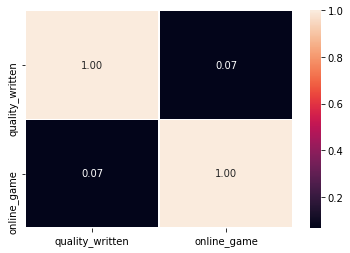

In [106]:
sns.heatmap(data2.corr(), annot=True, fmt = '.2f', linewidths=0.2)
plt.show()

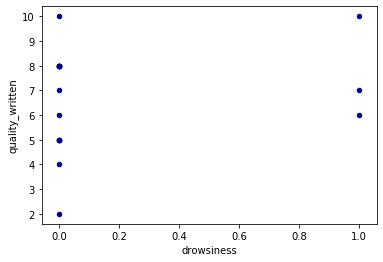

In [194]:
ax1 = data.plot.scatter(x='drowsiness', y='quality_written',c='DarkBlue')

In [108]:
data3 = data[['quality_written', 'tiredness', 'nap' ,'total_sleep_hour' , 'phone_before_bed', 'alcohol']]

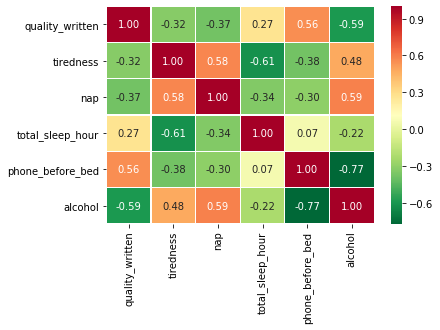

In [110]:
sns.heatmap(data3.corr(), annot=True, cmap='RdYlGn_r', fmt = '.2f', linewidths=0.2)
plt.show()

In [128]:
#-0.61
data4 = data[['tiredness', 'total_sleep_hour']]

In [126]:
#0.41
data4 = data[['tiredness', 'last_meal']]

In [124]:
#-0.37
data4 = data[['tiredness', 'last_meal_heaviness']]

In [122]:
#0.27
data4 = data[['tiredness', 'phone_usage_time']].astype(str).astype(int)

In [120]:
#0.28
data4 = data[['tiredness', 'stress_strength']]

In [131]:
#0.49
data4 = data[['tiredness', 'drowsiness']]

In [136]:
#-0.25
data4 = data[['tiredness', 'nap_next_day']]

In [138]:
#0.25
data4 = data[['tiredness', 'exercise']]

In [143]:
#0.25
data4 = data[['tiredness', 'exercise_time']].astype(str).astype(int)

In [146]:
#0.58
data4 = data[['tiredness', 'nap']]

In [148]:
#-0.59
data4= data[['quality_written', 'alcohol']]

In [150]:
#0.04
data4 = data[['tiredness', 'min_taken_since_first_alarm' ]].astype(str).astype(int)

In [152]:
#0.49
data4 = data[['tiredness', 'num_of_alarm' ]].astype(str).astype(int)

In [154]:
#-0.27
data4 = data[['tiredness', 'online_game' ]]

In [ ]:
sns.heatmap(data4.corr(), annot=True, cmap='RdYlGn_r', fmt = '.2f', linewidths=0.2)
plt.show()

In [156]:
data5 = data[['tiredness','total_sleep_hour','drowsiness', 'nap', 'alcohol', 'last_meal', 'last_meal_heaviness']]

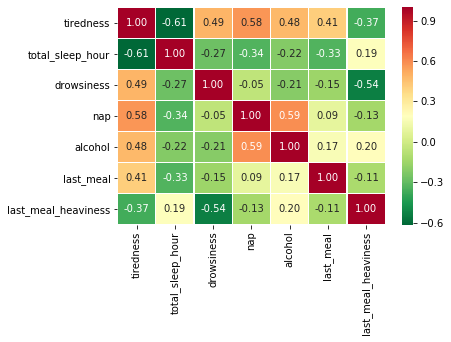

In [157]:
sns.heatmap(data5.corr(), annot=True, cmap='RdYlGn_r', fmt = '.2f', linewidths=0.2)
plt.show()

In [159]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

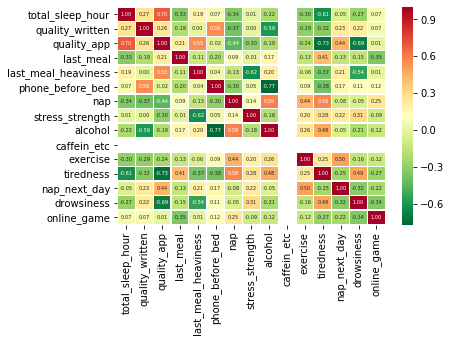

In [173]:
sns.heatmap(data.corr(), annot=True,annot_kws={"size": 5} ,cmap='RdYlGn_r', fmt = '.2f', linewidths=0.2)
plt.show()

In [174]:
data['caffein_etc']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
Name: caffein_etc, dtype: int64

In [11]:
import sklearn.datasets as datasets
y=data['quality_written']

In [1]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [2]:
data6 = data.drop(columns=['date', 'day','bed_time'])

NameError: name 'data' is not defined

In [ ]:
data6

In [3]:
data6 = data6.fillna(0)

NameError: name 'data6' is not defined

In [16]:
dtree.fit(data6,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

c:\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [18]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=[''],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


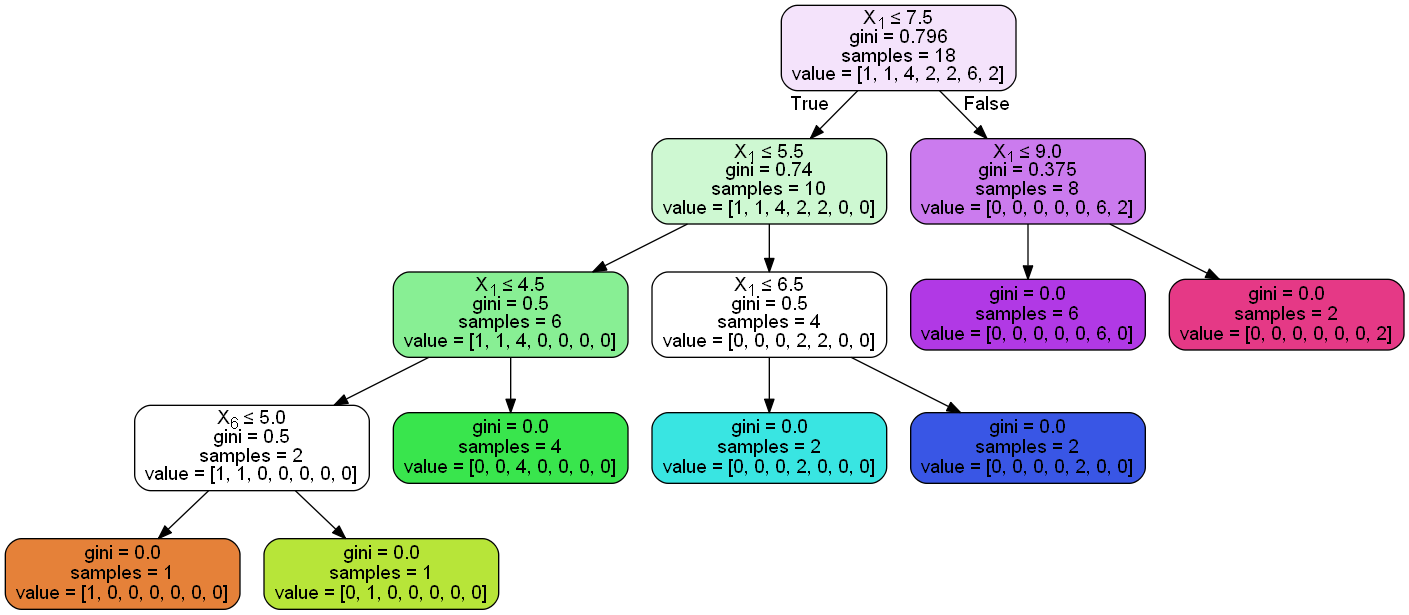

In [19]:
Image(graph.create_png())